## NOTEBOOK CONTENTS

    -plots of DIC difference (BR-PI run) by month for averaged fields at 0, 20, 50, 100m
    -monthly averaged timeseries of DIC values and their differences for the 4 broad subregions
    -plots of OmA difference (BR-PI) by month for averaged fields at 0, 20, 50, 100m 
    -monthly averaged timeseries of OmA values and their differences for the 4 broad subregions
    -plots of pH difference (BR-PI) by month for averaged fields at 0, 10, 50m 
    -monthly averaged timeseries of pH values and their differences for the 4 broad subregions

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools




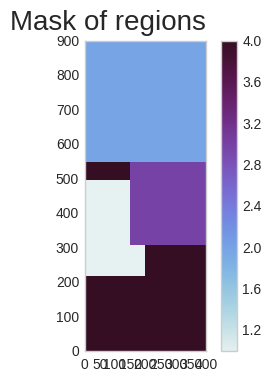

In [10]:
mask = np.zeros([40,898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[:,y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[:,y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[:,y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[0,:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('Mask of regions',fontsize=20)
surfmask = mask[0,:,:]

In [16]:

td = '01jan15'
tdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/depth_profile_ncs'
w = nc.Dataset(f'{tdir}/BR2015_{td}_prof.nc')

dp = [0,18,23,26]
for i in range(0,len(dp)):
    print('At depth level ', str(dp[i]), ' depth is ', str(w['Profiles']['depth'][dp[i]]))

At depth level  0  depth is  0.5000003
At depth level  18  depth is  19.481785
At depth level  23  depth is  44.517723
At depth level  26  depth is  98.06296


## SURFACE DIC DIFFERENCE BR-PI

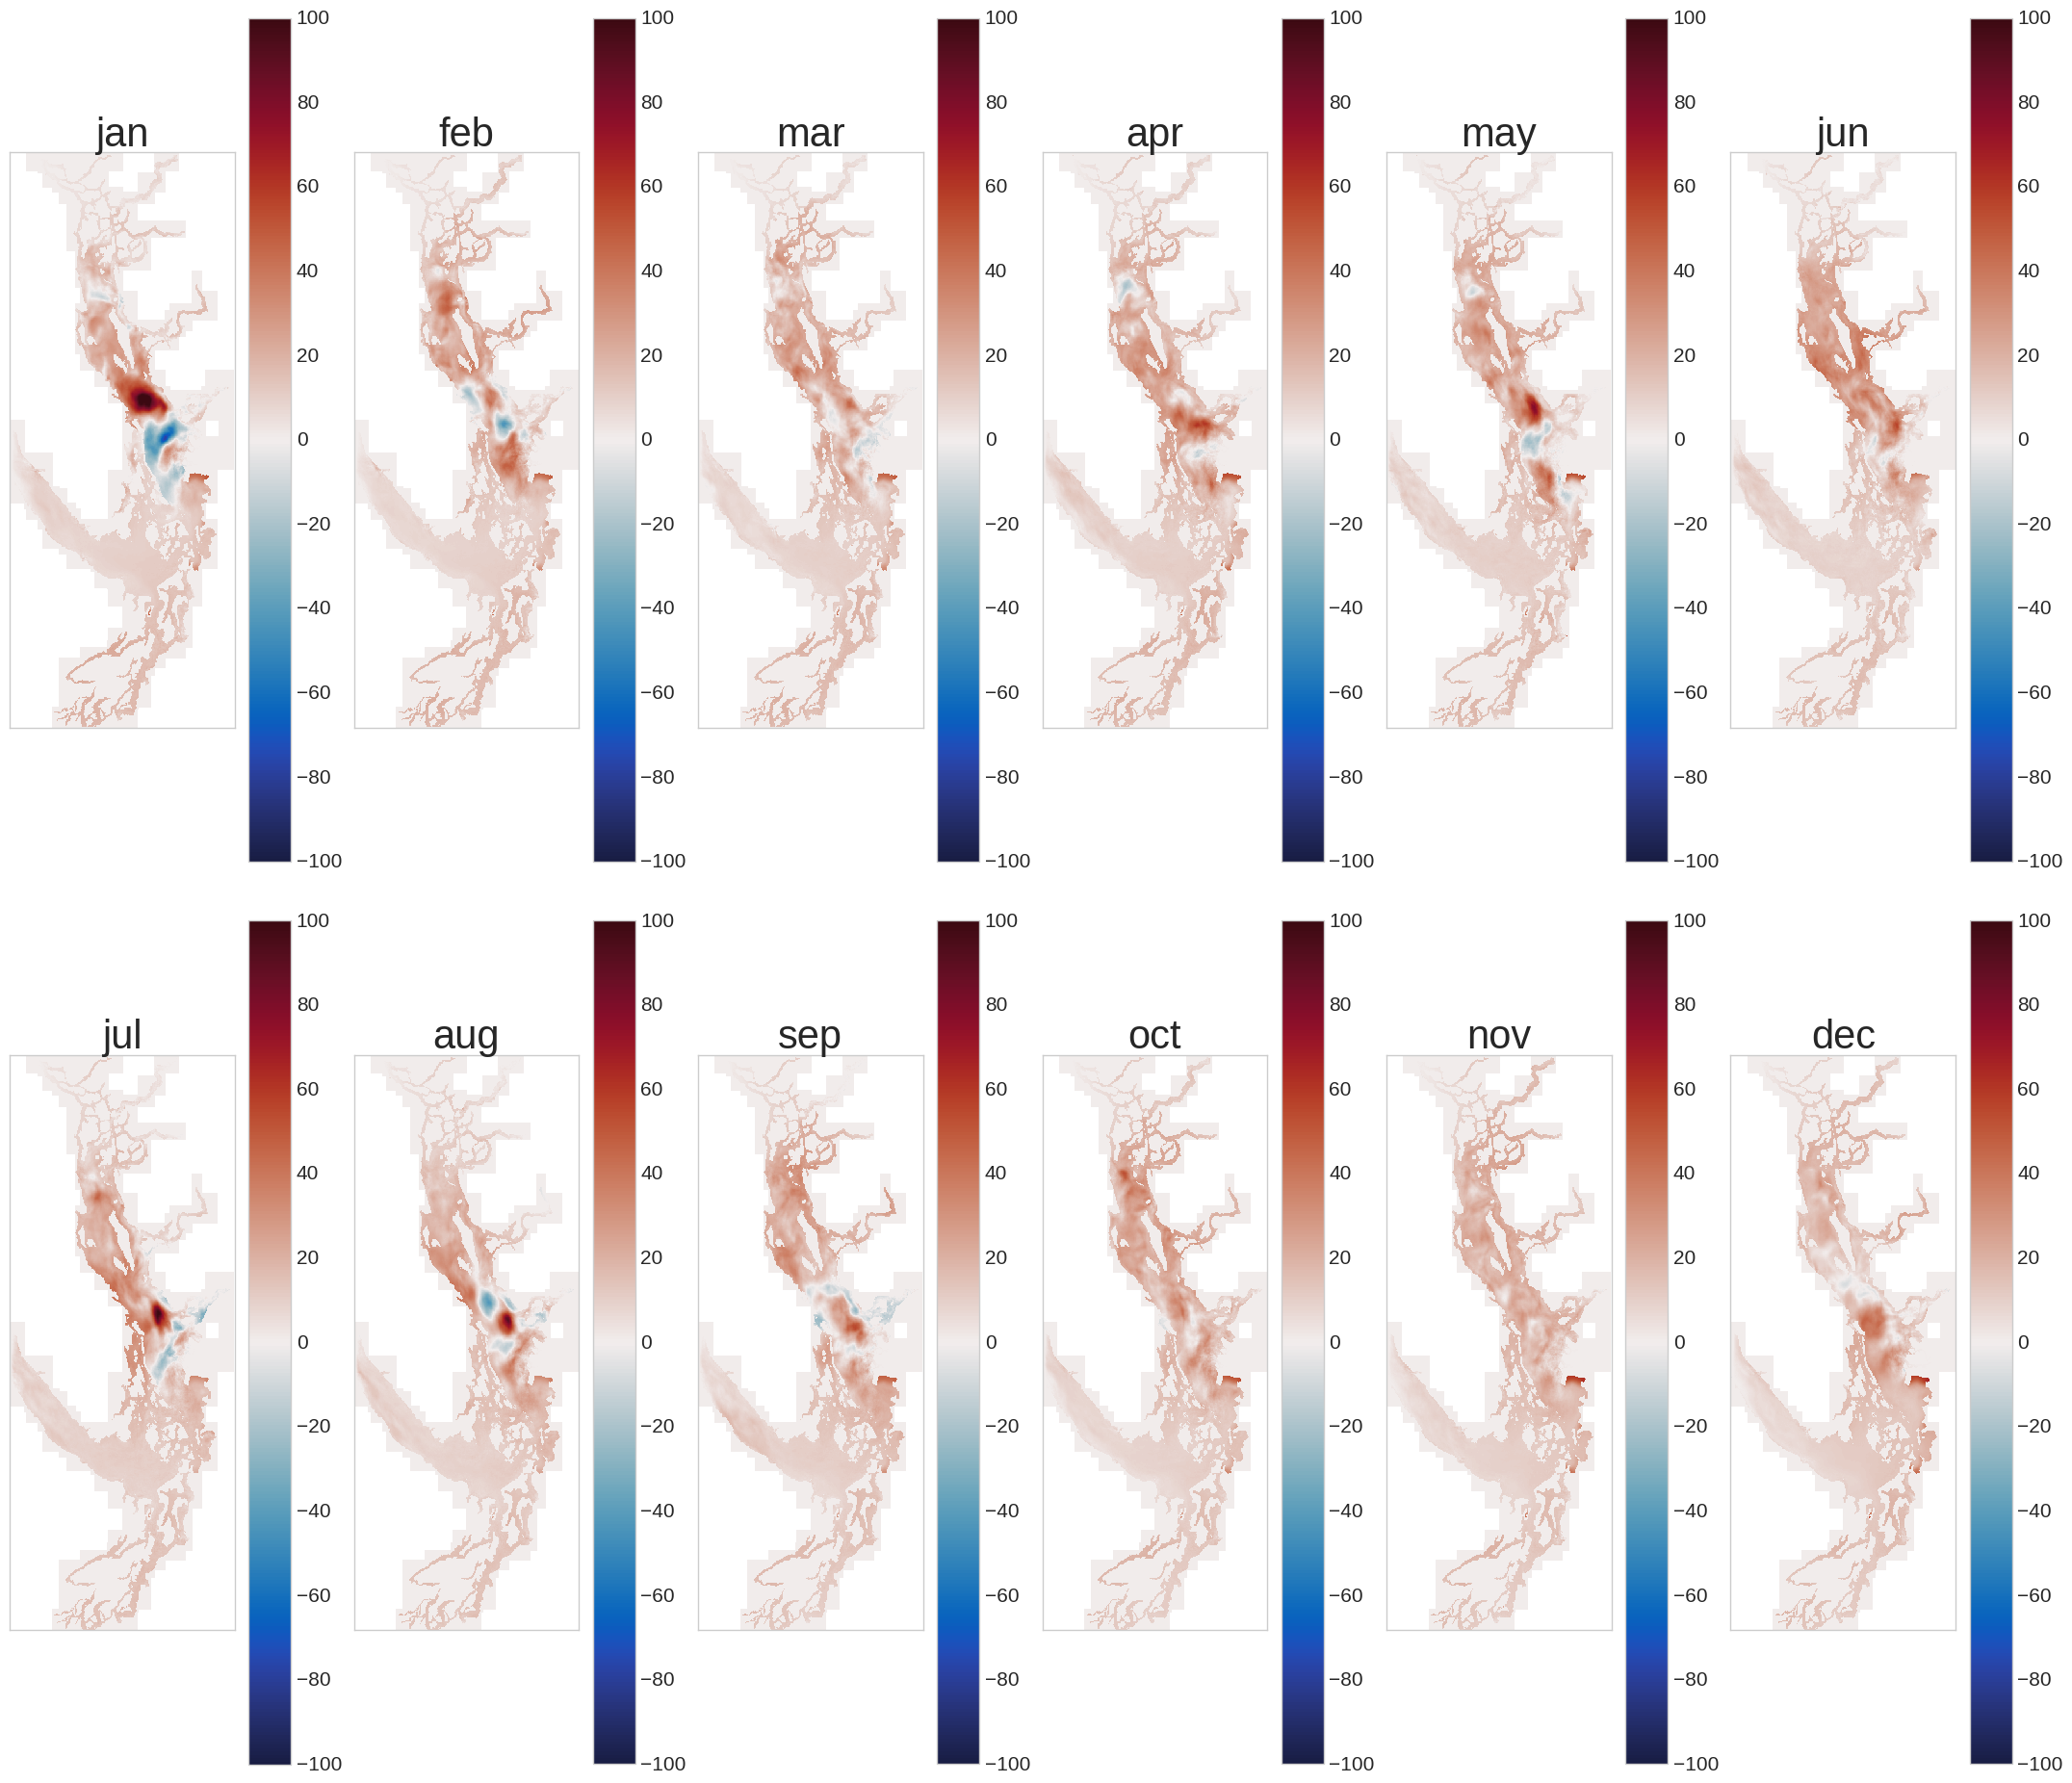

In [11]:
fact = 1.8
mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

fig = plt.figure(figsize=(12*fact,10.5*fact))

for i in range(1,13):
    mon = mons[i-1]
    plotstr_PI = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
    plotstr_BR = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'

    tnc_BR =nc.Dataset(plotstr_BR)
    tnc_PI =nc.Dataset(plotstr_PI)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep
    tplt = tnc_BR['dissolved_inorganic_carbon'][0,0,:,:]-tnc_PI['dissolved_inorganic_carbon'][0,0,:,:]
    viz_tools.set_aspect(ax1)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-100, vmax=100)
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)
#plt.suptitle('BR - PI surface DIC', fontsize =40)
plt.tight_layout()


## 10 m DIC DIFFERENCE BR-PI

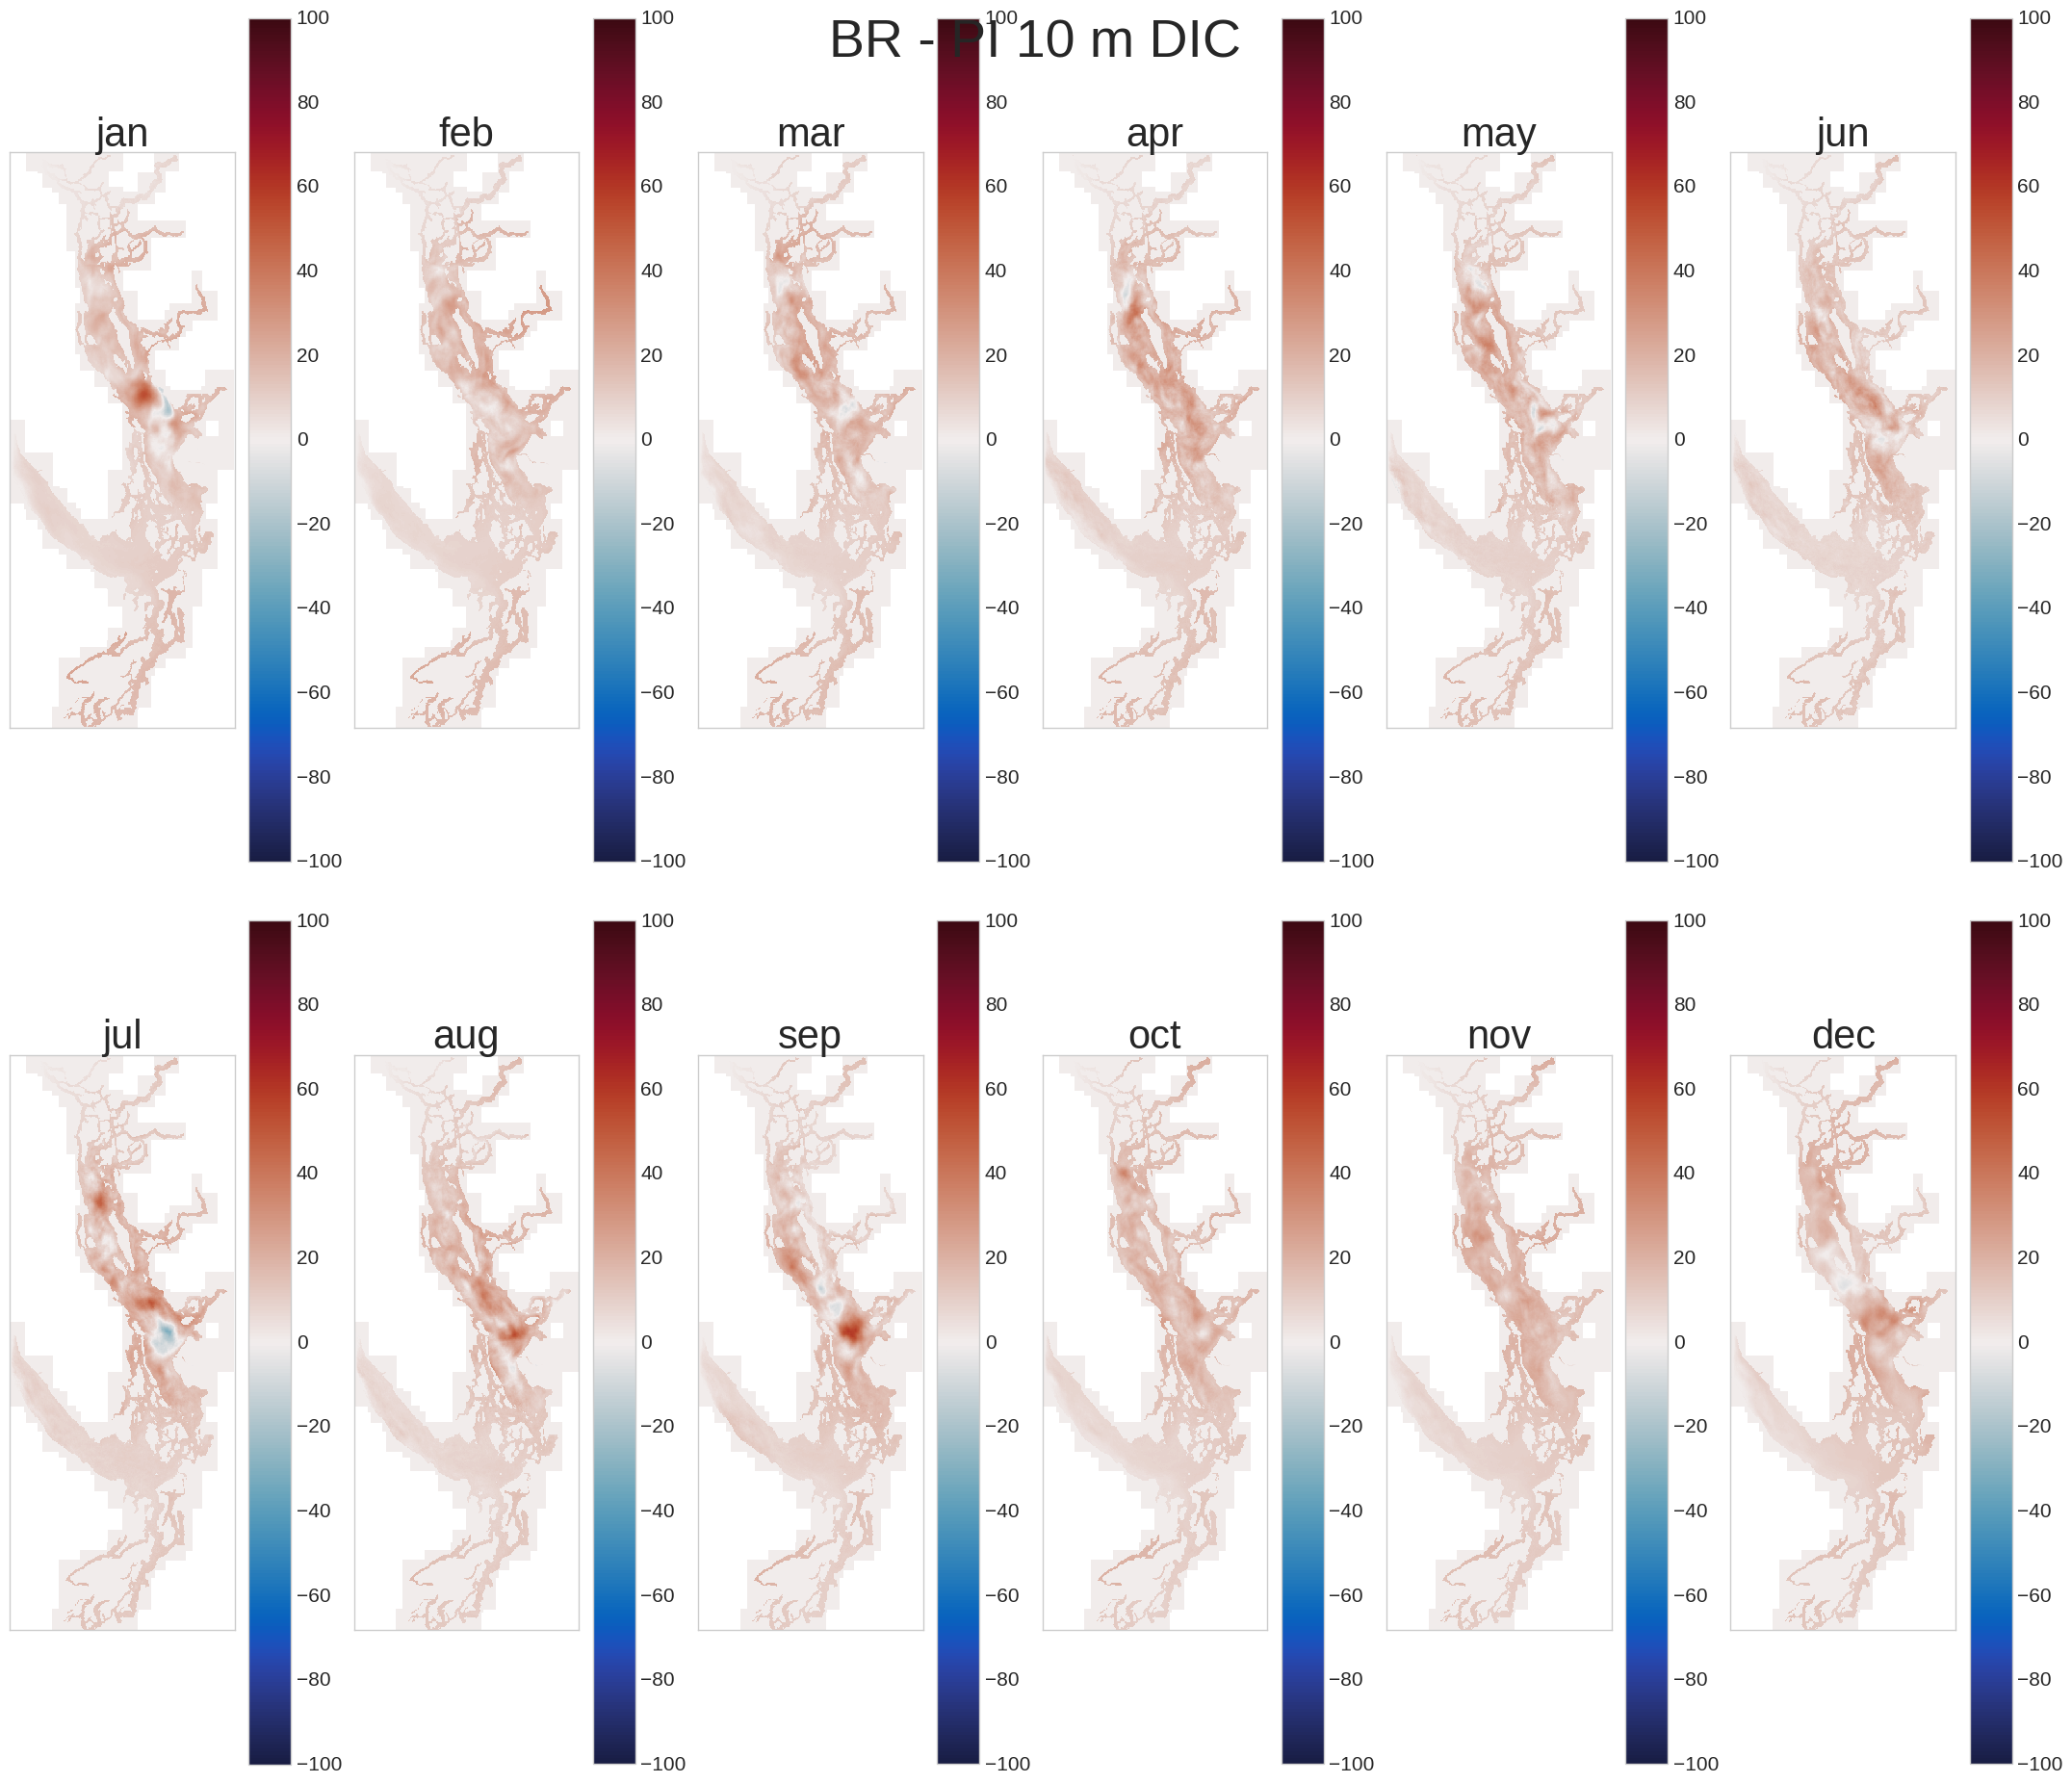

In [7]:
fact = 1.8
mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

fig = plt.figure(figsize=(12*fact,10.5*fact))

for i in range(1,13):
    mon = mons[i-1]
    plotstr_PI = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
    plotstr_BR = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'

    tnc_BR =nc.Dataset(plotstr_BR)
    tnc_PI =nc.Dataset(plotstr_PI)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep
    tplt = tnc_BR['dissolved_inorganic_carbon'][0,10,:,:]-tnc_PI['dissolved_inorganic_carbon'][0,10,:,:]
    viz_tools.set_aspect(ax1)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-100, vmax=100)
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)
plt.suptitle('BR - PI 10 m DIC', fontsize =40)
plt.tight_layout()


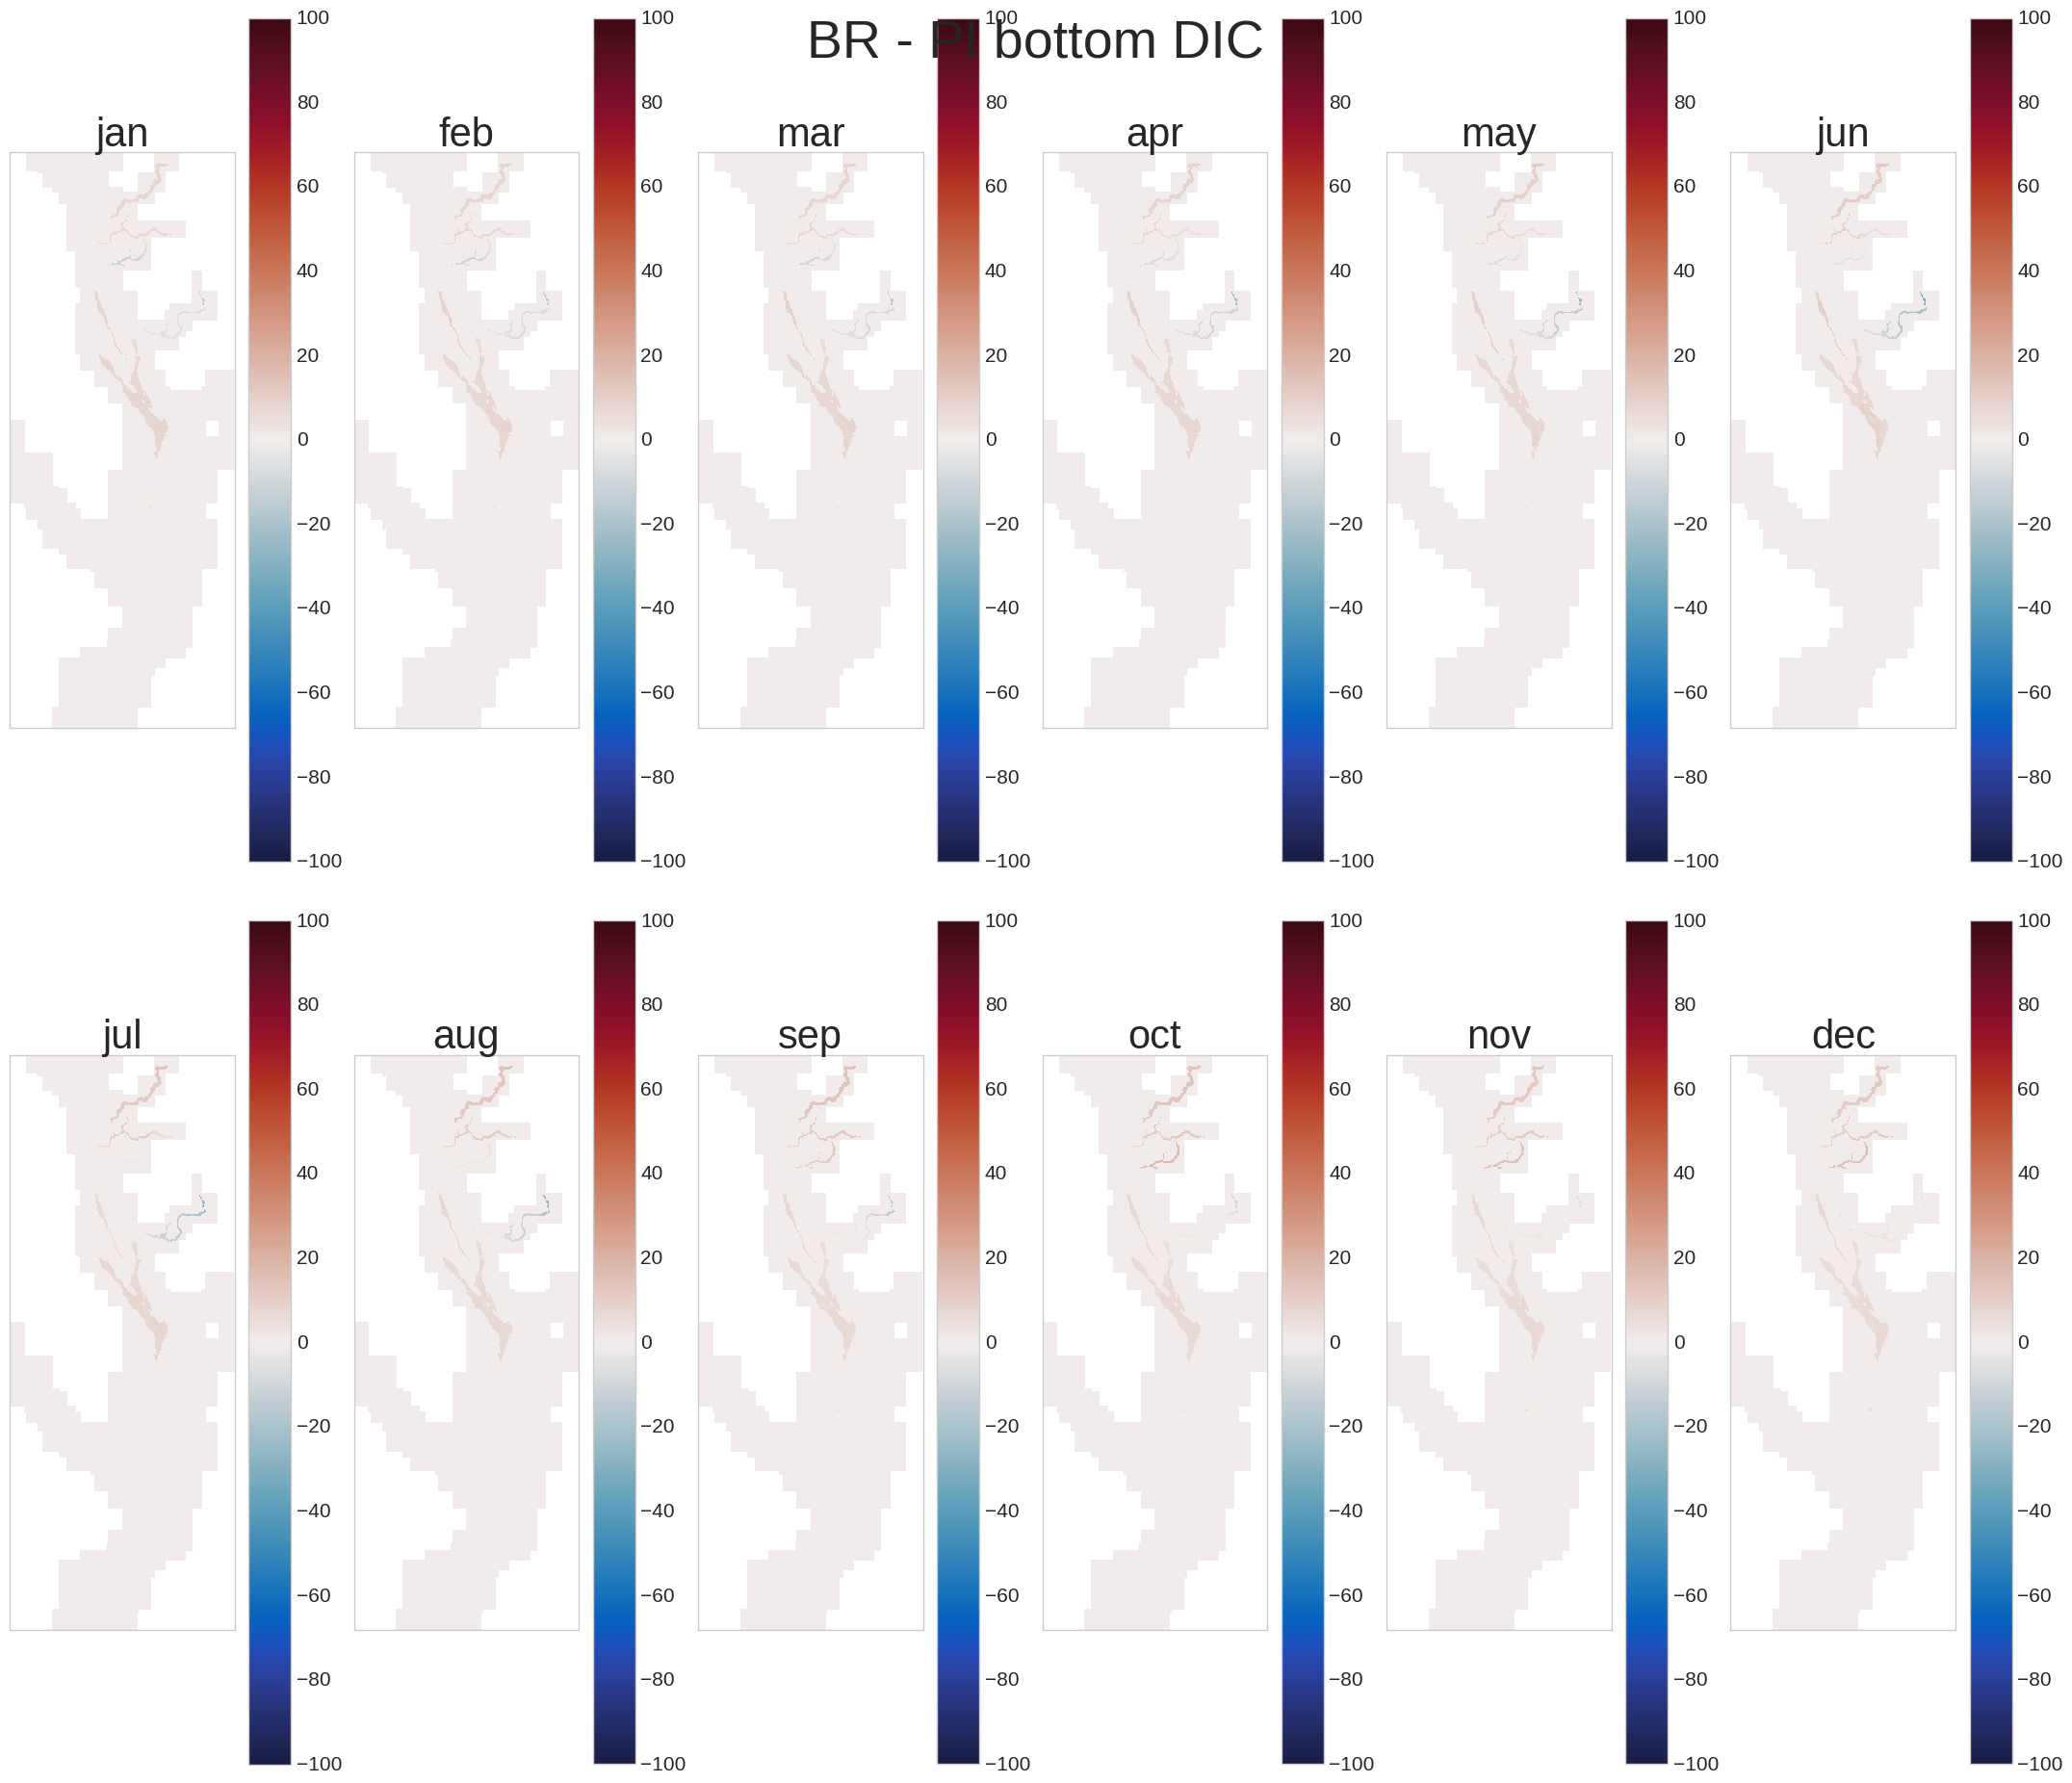

In [8]:
fact = 1.8
mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

fig = plt.figure(figsize=(12*fact,10.5*fact))

for i in range(1,13):
    mon = mons[i-1]
    plotstr_PI = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
    plotstr_BR = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'

    tnc_BR =nc.Dataset(plotstr_BR)
    tnc_PI =nc.Dataset(plotstr_PI)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep
    tplt = tnc_BR['dissolved_inorganic_carbon'][0,35,:,:]-tnc_PI['dissolved_inorganic_carbon'][0,35,:,:]
    viz_tools.set_aspect(ax1)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-100, vmax=100)
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)
plt.suptitle('BR - PI bottom DIC', fontsize =40)
plt.tight_layout()
